# 

In [29]:
%%capture
%pip install plotly==5.9.0
%pip install twisted
%pip install binance-connector==1.13.0
%pip install pandas 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [30]:
import os
strategies=["SimpleKerasStrategy", "LSTMStrategy"]
os.system("cd ./../deploy/yandex_cloud; ./download_data.sh")
data_dir=f"../data/yandex-cloud"
print(f"Download completed. Local data dir: {data_dir}")

rsync -v -r yc-user@51.250.12.103:/home/yc-user/biml/data/ /home/dima/projects/biml/deploy/yandex_cloud/../../data/yandex-cloud
receiving incremental file list
LSTMStrategy/LSTMStrategy.db
LSTMStrategy/Xy/2023-05-22_BTCUSDT_X.csv
LSTMStrategy/Xy/2023-05-22_BTCUSDT_data.csv
LSTMStrategy/Xy/2023-05-22_BTCUSDT_y.csv
LSTMStrategy/Xy/2023-05-23_BTCUSDT_X.csv
LSTMStrategy/Xy/2023-05-23_BTCUSDT_data.csv
LSTMStrategy/Xy/2023-05-23_BTCUSDT_y.csv


file has vanished: "/home/yc-user/biml/data/LSTMStrategy/weights/2023-05-23T06:53:53.841717.data-00000-of-00001"
file has vanished: "/home/yc-user/biml/data/LSTMStrategy/weights/2023-05-23T06:53:53.841717.index"


LSTMStrategy/weights/checkpoint
SimpleKerasStrategy/SimpleKerasStrategy.db
SimpleKerasStrategy/Xy/2023-05-22_BTCUSDT_X.csv
SimpleKerasStrategy/Xy/2023-05-22_BTCUSDT_data.csv
SimpleKerasStrategy/Xy/2023-05-22_BTCUSDT_y.csv
SimpleKerasStrategy/Xy/2023-05-23_BTCUSDT_X.csv
SimpleKerasStrategy/Xy/2023-05-23_BTCUSDT_data.csv
SimpleKerasStrategy/Xy/2023-05-23_BTCUSDT_y.csv


file has vanished: "/home/yc-user/biml/data/SimpleKerasStrategy/weights/2023-05-23T06:53:52.946118.data-00000-of-00001"
file has vanished: "/home/yc-user/biml/data/SimpleKerasStrategy/weights/2023-05-23T06:53:52.946118.index"


SimpleKerasStrategy/weights/checkpoint

sent 668,696 bytes  received 10,577,936 bytes  171,704.31 bytes/sec
total size is 1,174,766,158  speedup is 104.45
Download completed. Local data dir: ../data/yandex-cloud


rsync warning: some files vanished before they could be transferred (code 24) at main.c(1684) [generator=3.1.3]


In [34]:
import pandas as pd
import numpy as np

def get_trades(data_dir: str, strategy: str):
    import sqlite3
    db_path=f"{data_dir}/{strategy}/{strategy}.db"
    print(f"Get trades from {db_path}")

    with sqlite3.connect(db_path) as conn:
        trades=pd.read_sql_query("SELECT * FROM trade ORDER BY open_time",conn,
                                 parse_dates=["open_time", "close_time"])#.set_index("open_time", drop=False)
    trades["profit"] = np.where(trades["side"] == "BUY", 
                                (trades["close_price"]-trades["open_price"])*trades["quantity"],
                                (trades["open_price"]-trades["close_price"])*trades["quantity"],
                               )
    trades["cum_profit"] = trades["profit"].cumsum()
    
    return trades


Get trades from ../data/yandex-cloud/SimpleKerasStrategy/SimpleKerasStrategy.db


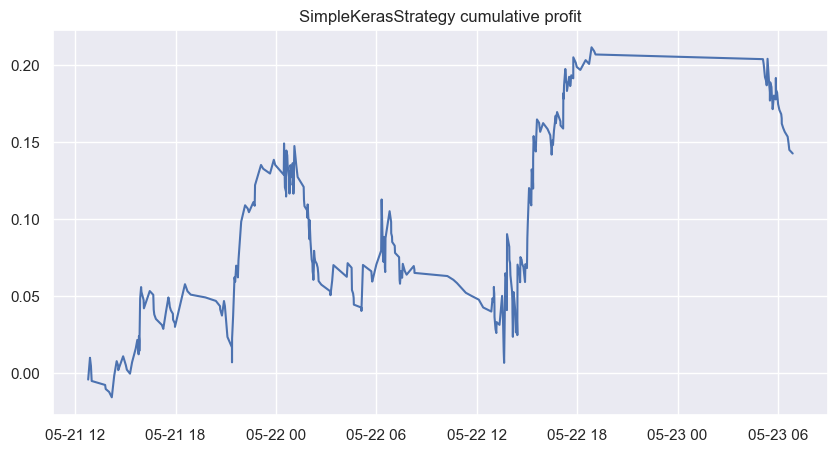

Get trades from ../data/yandex-cloud/LSTMStrategy/LSTMStrategy.db


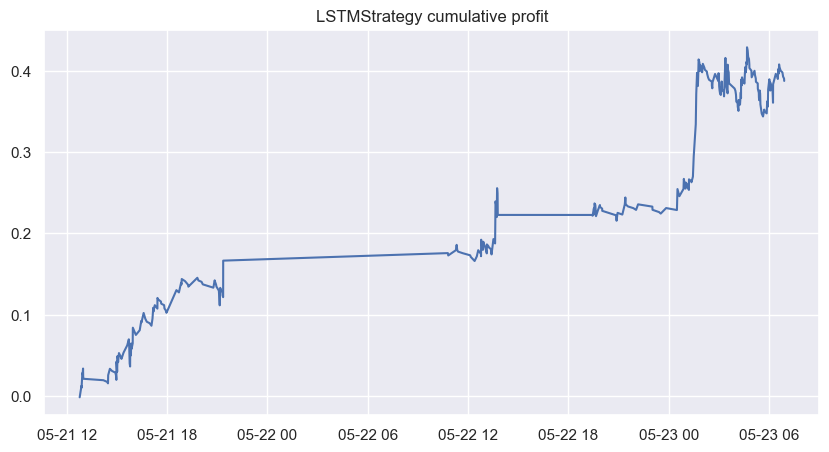

In [35]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme()
#paper, notebook, talk, poster

import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = "plotly_mimetype+notebook"
import plotly.graph_objects as go

    
plot_figsize=(10,5)


def plot_profit_plotly(strategy, trades):
    """ Plot profit charts using plotly"""
    px.line(trades, x="open_time", y="profit", title=f"{strategy} profit").update_traces(mode='lines+markers').show()
    
def plot_cum_profit_plotly(strategy, trades):
    px.line(trades, x="open_time", y="cum_profit", title=f"{strategy} cumulative profit").update_traces(mode='lines+markers').show()

def plot_profits_plotly(strategy, trades):
    plot_profit_plotly(strategy, trades)
    plot_cum_profit_plotly(strategy, trades)
    
def plot_profit_sns(strategy, trades):
    """ Plot profit charts using sns"""
    plt.figure(figsize=plot_figsize)
    sns.set_style("darkgrid")
    sns.lineplot(data=trades, x="open_time", y="profit").set_title(f"{strategy} profit")
    plt.show()

def plot_cum_profit_sns(strategy, trades):

    #sns.set_palette("deep")
    sns.set_style("whitegrid")
    plt.figure(figsize=plot_figsize)
    sns.lineplot(data=trades, x="open_time", y="cum_profit").set_title( f"{strategy} cumulative profit")
    plt.show()

def plot_cum_filtered_profit_sns(strategy, trades):
    
    # Cumulative profit w/o outliers
    profit=trades[["open_time","profit"]].set_index("open_time")
    q_low = profit["profit"].quantile(0.1)
    q_hi  = profit["profit"].quantile(0.9)
    profit_filtered = profit[(profit["profit"] < q_hi) & (profit["profit"] > q_low)]
    cumsum_filtered = profit_filtered.cumsum()
    plt.figure(figsize=plot_figsize)
    sns.set_style("darkgrid")
    sns.lineplot(data=cumsum_filtered).set_title(f"{strategy} profit w/o outliers")
    plt.show()

def plot_profits_sns(strategy, trades):
    plot_profit_sns(strategy, trades)
    plot_cum_profit_sns(strategy, trades)
    plot_cum_filtered_profit_sns(strategy, trades)
    

def plot_profit_plt(strategy, trades):
    """ Plot profits using matplotlib """
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    plt.plot("open_time", "profit", data=trades)
    plt.title(f"{strategy} profit")
    plt.show()
    
def plot_cum_profit_plt(strategy, trades):

    sns.set_style("darkgrid")
    plt.figure(figsize=(10,5))
    plt.plot("open_time", "cum_profit", data=trades)
    plt.title(f"{strategy} cumulative profit")
    plt.show()

def plot_profits_plt(strategy, trades):
    plot_profit_plt(strategy, trades)
    plot_cum_profit_plt(strategy, trades)
    
    
def plot_strategies_profits(plot_func):
    for strategy in strategies:
        trades=get_trades(data_dir, strategy)
        plot_func(strategy, trades)
        #plot_cum_profit_plt(strategy, trades)
    
#plot_profits_plotly(strategy, trades)
#plot_profits_sns(strategy, trades)
#plot_profits_plt(strategy, trades)

plot_strategies_profits(plot_cum_profit_plt)
